In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit as cf

# Lectura de datos
Estos datos, contienen 475024 mediciones recogidas en una casa situada en Sceaux (7 km de París, Francia) entre enero y noviembre de 2010 (11 meses).

In [41]:
#invocamos los archivos csv
Gap = pd.read_csv("Global_active_power.csv")
Gi = pd.read_csv("Global_intensity.csv")
Grp = pd.read_csv("Global_reactive_power.csv")
Volt = pd.read_csv("Voltage.csv")

# Concatenamos los datos

In [42]:
#concatenamos las columnas todas respepecto a la columna Datetime
data = pd.merge(Gap,Grp,how='left').merge(Gi, how='left').merge(Volt, how='left').dropna()

In [43]:
#hacemos la conversion de los datos a vatio/hora
data["Global_active_power"]= round(data["Global_active_power"]*1000/60,4)
data["Global_reactive_power"]= round(data["Global_reactive_power"]*1000/60,4)
data

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,29.8333,3.9333,7.4,240.65
1,2010-01-01 00:01:00,29.6667,3.9000,7.4,240.07
2,2010-01-01 00:02:00,29.6667,3.9000,7.4,240.15
3,2010-01-01 00:03:00,29.1000,3.1000,7.2,240.26
4,2010-01-01 00:04:00,28.1000,1.7000,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,15.7667,0.0000,4.0,240.43
457391,2010-11-26 20:59:00,15.7333,0.0000,4.0,240.00
457392,2010-11-26 21:00:00,15.6333,0.0000,3.8,239.82
457393,2010-11-26 21:01:00,15.5667,0.0000,3.8,239.70


# Resample

In [44]:
#Convertimos a Datetime en el index para nuestro resample
data["Datetime"] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [45]:
#hacemos el resample para los dias
data_dias = data.resample('D').mean()
#hacemos el resample para los mese
data_meses = data.resample('M').mean()

In [94]:
data_dias = data_dias.dropna()
data_dias

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01,14.169584,1.913611,3.537083,242.565722
2010-01-02,19.603913,1.444259,4.857778,243.631743
2010-01-03,15.031574,1.505509,3.757778,241.822778
2010-01-04,19.530556,1.672037,4.879028,241.754160
2010-01-05,15.279607,2.228288,3.929861,240.647167
...,...,...,...,...
2010-12-07,12.842293,3.309168,3.397222,240.218646
2010-12-08,6.130764,1.957153,1.623750,240.794931
2010-12-09,18.658472,2.330534,4.755694,241.619722


In [96]:
data_meses = data_meses.dropna()
data_meses

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,21.677332,2.086373,5.430332,242.338522
2010-02-28,19.292318,1.824454,4.836624,242.002101
2010-03-31,19.500253,2.272798,4.920399,241.475284
2010-04-30,17.272231,2.159277,4.363496,241.442527
2010-05-31,17.932616,2.120352,4.551504,241.296151
2010-06-30,16.255103,2.425413,4.170282,240.888985
2010-07-31,12.982456,2.301543,3.337202,240.965167
2010-08-31,15.490873,2.180258,3.954423,241.422944
2010-09-30,16.625686,2.128338,4.223837,241.267517


# Visualizacion de datos

<function matplotlib.pyplot.show(close=None, block=None)>

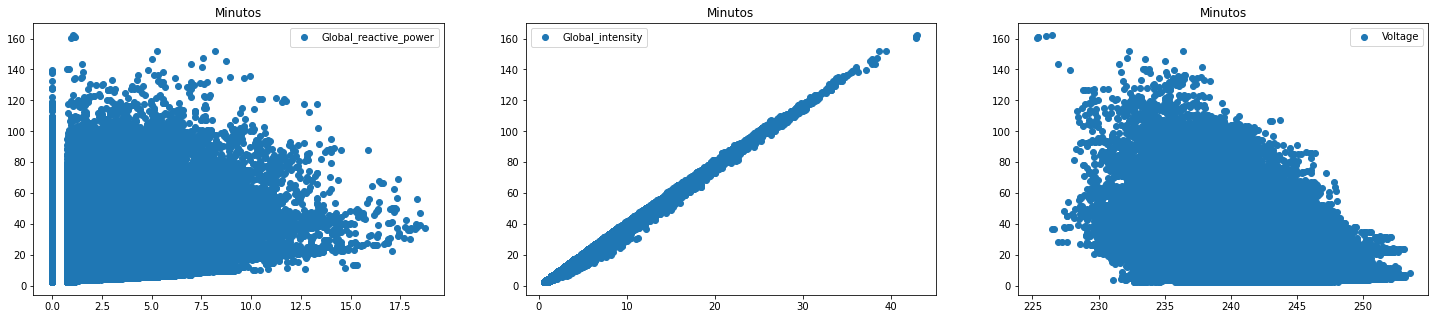

In [48]:
plt.figure(figsize=(25,5))
for i,j in enumerate (data.columns[1:]):
    plt.subplot(1,3,i+1)
    plt.scatter(data[j],data["Global_active_power"],label=j)
    plt.legend()
    plt.title("Minutos")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

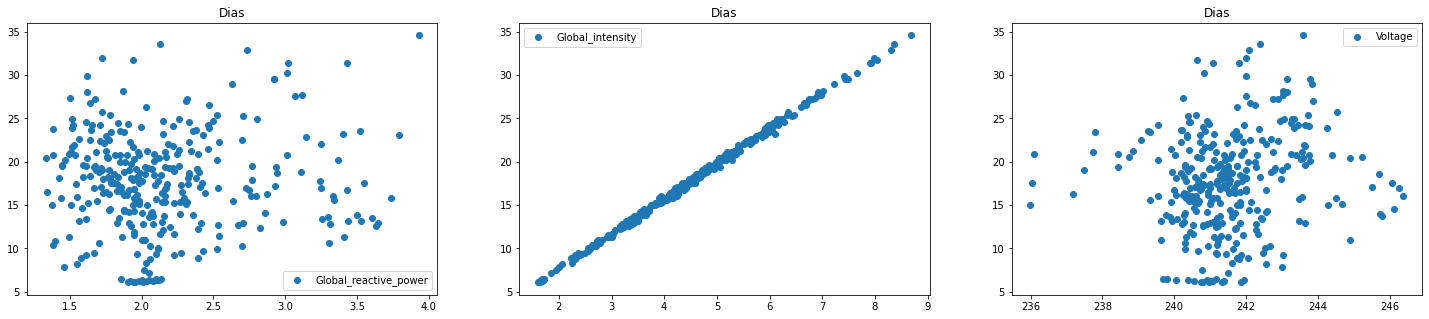

In [49]:
plt.figure(figsize=(25,5))
for i,j in enumerate (data_dias.columns[1:]):
    plt.subplot(1,3,i+1)
    plt.scatter(data_dias[j],data_dias["Global_active_power"],label=j)
    plt.legend()
    plt.title("Dias")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

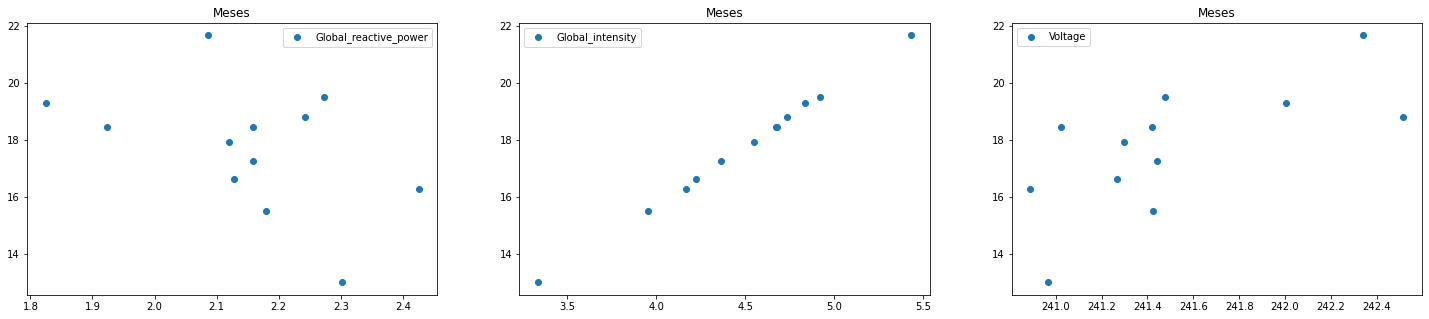

In [50]:
plt.figure(figsize=(25,5))
for i,j in enumerate (data_meses.columns[1:]):
    plt.subplot(1,3,i+1)
    plt.scatter(data_meses[j],data_meses["Global_active_power"],label=j)
    plt.legend()
    plt.title("Meses")
plt.show

# Ajuste de curvas

In [57]:
# definimos las funciones que va a procesar el curve_fit para calcular la regresion
# rel12 es las misma funcion tanto para Global intensity y Voltaje
def rel12(x, a, b):
    return a*x + b
# rel3 para Global_active_power and voltage
def rel3(X, a, b, c):
    x1, x2 = X
    return a*x1+b*x2+c

In [99]:
# hacemos una funcion para generar los graficos
# relx es la funcion que calcula la regresion y relacion de los datos
# x es es eje x se puede colocar con cualquier resample y las columnas Voltage o Global_intensity
# y es el eje y se debe colocar el mismo resample que el anterior y se usa la columna Global_active_power
# labelx es la leyenda en el x
# labely es la leyenda en el eje y
# resamp es el tipo de resample que usamos
# D define la funcion en un espacio de 3 dimensiones
# labelz es la leyenda en el eje z
def fit(relx, x, y, labelx, labely, resamp,D = False,labelz = None):
    # coeficientes y sigmas
    popt, pcov = cf(relx, x, y)
    pcov = np.sqrt(np.diag(pcov))
    # error sobre la regresion
    E=np.sqrt(np.mean((y-relx(x, *popt))**2))
    # imprimimos la figura
    
    # usamos la funcion if, para automatizar 
    if D == False:
        plt.figure(figsize=(8,6))
        plt.plot(x, relx(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
        plt.scatter(x, y,label=resamp)
        plt.xlabel(labelx, fontsize=15)
        plt.ylabel(labely, fontsize=15)
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(8,6))
        ax = plt.axes(projection = "3d")
        
        xl=np.linspace(x[0].min(),x[0].max(),100)
        yl=np.linspace(x[1].min(),x[1].max(),100)
        z = relx((xl, yl), *popt)
        
        ax.plot3D(xl, yl, z, "red", label= "Curve_fit")
        ax.scatter3D(x[0], x[1], y, label= resamp)
        ax.set_xlabel(labelx, fontsize=15)
        ax.set_ylabel(labely, fontsize=15)
        ax.set_zlabel(labelz, fontsize=15)
        plt.legend()
    # imprimimos la informacion del error, sigmas, y coeficientes
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    print("Error on fit is ={}".format(E))

# Relacion 1
## $Global active power = A1(Global intensity) + B1$

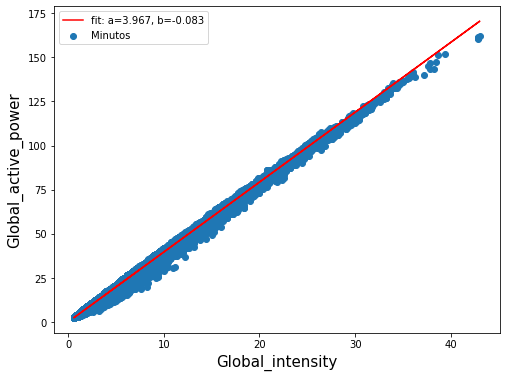

Coeficients are : [ 3.96710338 -0.08303466]
Sigma_Coeficients are : [0.0003101  0.00184445]
Error on fit is =0.8209165137741702


In [100]:
fit(rel12,data["Global_intensity"],data["Global_active_power"],"Global_intensity","Global_active_power","Minutos",D = False)

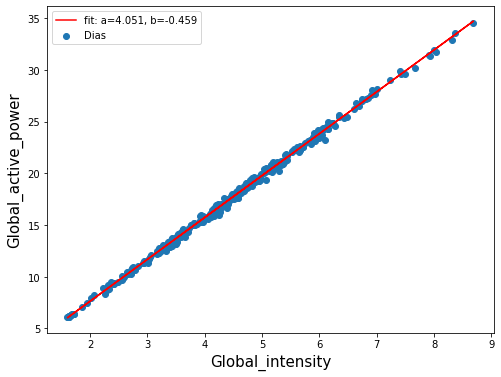

Coeficients are : [ 4.05096557 -0.45887015]
Sigma_Coeficients are : [0.01000728 0.0470389 ]
Error on fit is =0.25374557549500665


In [107]:
fit(rel12,data_dias["Global_intensity"],data_dias["Global_active_power"],"Global_intensity","Global_active_power","Dias",D = False)

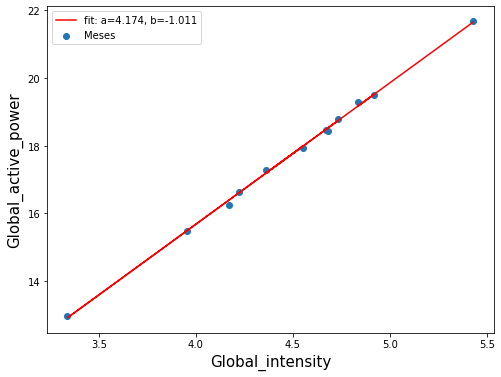

Coeficients are : [ 4.17380915 -1.01119935]
Sigma_Coeficients are : [0.04259665 0.19246934]
Error on fit is =0.06875967300523725


In [106]:
fit(rel12,data_meses["Global_intensity"],data_meses["Global_active_power"],"Global_intensity","Global_active_power","Meses",D = False)

# Relacion 2
## $Global active power = A2(Voltaje) + B2$

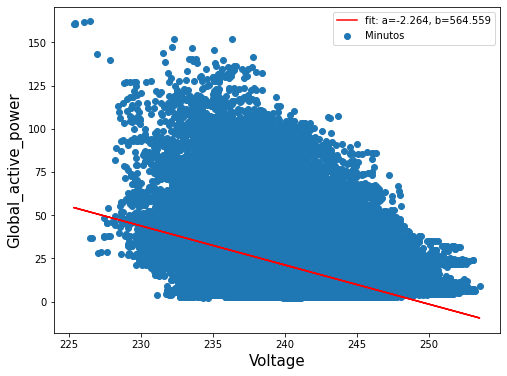

Coeficients are : [ -2.26434864 564.55873988]
Sigma_Coeficients are : [0.00733631 1.77195546]
Error on fit is =14.146558544143836


In [103]:
fit(rel12,data["Voltage"],data["Global_active_power"],"Voltage","Global_active_power","Minutos",D = False)

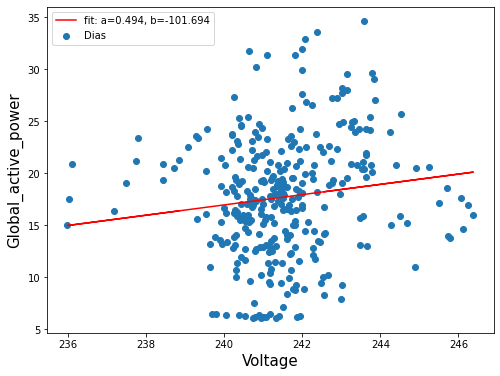

Coeficients are : [   0.49433823 -101.69447777]
Sigma_Coeficients are : [ 0.20628279 49.8228063 ]
Error on fit is =5.688045007192158


In [104]:
fit(rel12,data_dias["Voltage"],data_dias["Global_active_power"],"Voltage","Global_active_power","Dias",D = False)

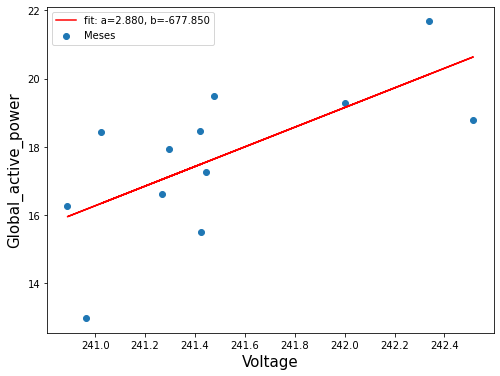

Coeficients are : [   2.88017555 -677.84969414]
Sigma_Coeficients are : [  0.99916782 241.3045303 ]
Error on fit is =1.5753665512029378


In [105]:
fit(rel12,data_meses["Voltage"],data_meses["Global_active_power"],"Voltage","Global_active_power","Meses",D = False)

# Relacion 3
## $Global active power = A31(Global intensity) + A32(Voltaje) + B3$

Coeficients are : [  3.99133274   0.07782055 -18.98641559]
Sigma_Coeficients are : [0.00033262 0.00045663 0.11093529]
Error on fit is =0.7960320221543389


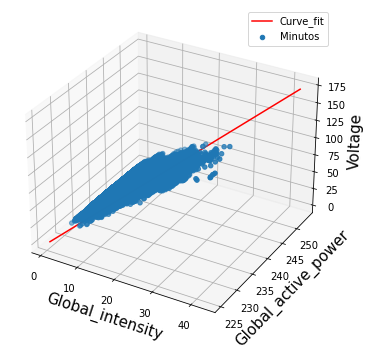

In [92]:
fit(rel3,(data["Global_intensity"],data["Voltage"]),data["Global_active_power"],"Global_intensity","Global_active_power","Minutos",D = True,labelz = "Voltage")

Coeficients are : [  4.0391741    0.10288298 -25.25450237]
Sigma_Coeficients are : [0.00790375 0.00726802 1.75204017]
Error on fit is =0.1989816241594084


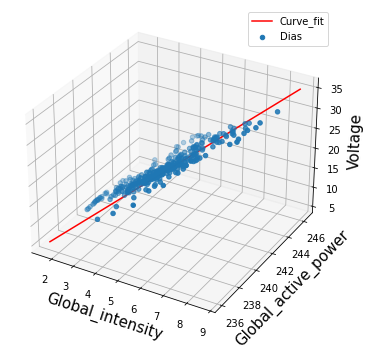

In [95]:
fit(rel3,(data_dias["Global_intensity"],data_dias["Voltage"]),data_dias["Global_active_power"],"Global_intensity","Global_active_power","Dias",D = True,labelz = "Voltage")

Coeficients are : [  4.08749871   0.1346886  -33.1516785 ]
Sigma_Coeficients are : [0.04020648 0.04116331 9.82367779]
Error on fit is =0.04646782117891004


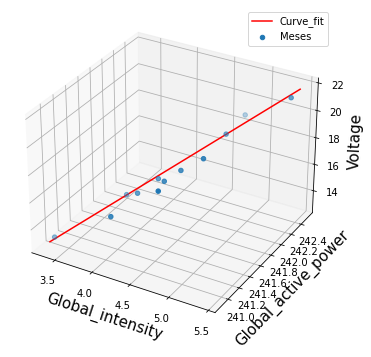

In [108]:
fit(rel3,(data_meses["Global_intensity"],data_meses["Voltage"]),data_meses["Global_active_power"],"Global_intensity","Global_active_power","Meses",D = True,labelz = "Voltage")

# Conclusiones
   Teniendo en cuenta los datos anteriormente obtenidos, podemos determinar que la mejor relacion es la tercera que presenta un margen de error más pequeño comparado con las demás relaciones.
   En este orden de ideas, es posible determinar que la peor relacion de datos fue la segunda que presentaba una mayor dispersion de los datos.
   Tambien es posible concluir que la dispersion decrece a medida que la distribucion de los datos es mayor es decir: Como el intervalo de tiempo en meses es mayor, la dispersion para los datos es mucho menor o mas cercana al promedio.